In [1]:
!git clone https://github.com/nicolas-dufour/instance-video-colorization


Cloning into 'instance-video-colorization'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (170/170), done.
remote: Total 173 (delta 1), reused 173 (delta 1), pack-reused 0
Receiving objects: 100% (173/173), 21.78 MiB | 33.74 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
%%capture
!pip install pytorch_lightning
!apt install ffmpeg
!pip install ffmpeg-python

In [5]:
import os
os.chdir('instance-video-colorization')

In [19]:
import torch
from torch.utils.data import DataLoader
import os
import pytorch_lightning as pl
from models.main import DeepVideoPriorColor
from data import PairImageDataset
import ffmpeg as ffmpeg
import matplotlib.pyplot as plt
from torchvision import transforms
from IPython.display import HTML
from base64 import b64encode

In [12]:
def display_video(path):
    mp4 = open(path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML("""
            <video width=400 controls>
                <source src="%s" type="video/mp4">
            </video>
            """ % data_url)

In [15]:
ffmpeg.input('data/dataset_gray_images/*.jpg', pattern_type='glob', framerate=25).output('output/videos/car_b&w.mp4').run()

(None, None)

In [17]:
display_video('output/videos/car_b&w.mp4')

In [20]:
dataset = PairImageDataset('data/dataset_gray_images', 'data/dataset_predict_color', transform = transforms.ToTensor())
dataloader = DataLoader(dataset, batch_size=1)

In [ ]:
trainer = pl.Trainer(max_epochs=50,gpus=1)
model = DeepVideoPriorColor()

GPU available: False, used: False
TPU available: None, using: 0 TPU cores


In [ ]:
trainer.fit(model,dataloader)


  | Name | Type              | Params
-------------------------------------------
0 | unet | UNet              | 8.6 M 
1 | loss | VGGPerceptualLoss | 7.6 M 
-------------------------------------------
16.3 M    Trainable params
0         Non-trainable params
16.3 M    Total params
/home/nicolas-dufour/anaconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

/home/nicolas-dufour/anaconda3/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  warnings.warn(*args, **kwargs)


1

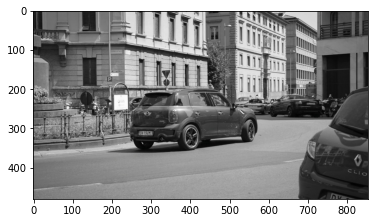

In [ ]:
img= cv2.imread('data/dataset_gray_images/480p_car-roundabout_00065.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
img.shape

(480, 854, 3)

In [ ]:
import numpy as np